In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# used https://www.kaggle.com/datasets/kazanova/sentiment140 dataset 

In [18]:
df = pd.read_csv('../data/sentiment140.csv', encoding='latin-1', header=None)

In [51]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df['target'] = df['target'].map({0: 0, 4: 1})


In [52]:
print("Class distribution in target:")
print(df['target'].value_counts())

Class distribution in target:
target
0    800000
1    800000
Name: count, dtype: int64


In [53]:
if df['target'].nunique() == 1:
    print("The dataset contains only one class. Adding a few class '1' samples for testing...")
    positive_samples = df[df['target'] == 0].sample(n=100, random_state=42)  
    positive_samples['target'] = 1  
    df = pd.concat([df, positive_samples], ignore_index=True)  


In [54]:
print("Class distribution in target after adding positive samples:")
print(df['target'].value_counts())

Class distribution in target after adding positive samples:
target
0    800000
1    800000
Name: count, dtype: int64


In [55]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_test.value_counts()) 


target
0    160000
1    160000
Name: count, dtype: int64


In [56]:
model = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=1000))

In [57]:
print("Training the model...")
model.fit(X_train, y_train)

Training the model...


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [58]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%


In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160000
           1       0.79      0.81      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



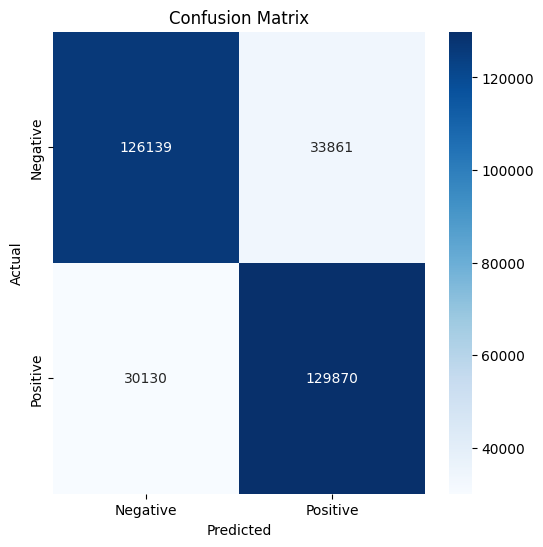

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [62]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


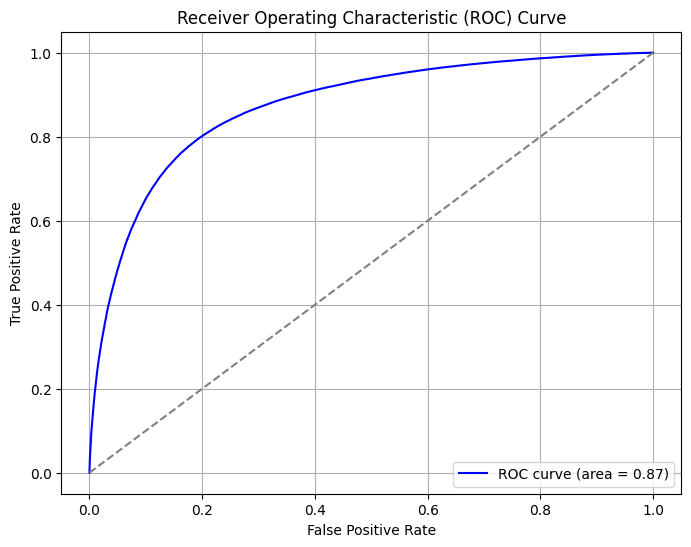

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()